In [1]:
import pandas as pd
import numpy as np

# 1. Collecting and preparing the data

a) First I have downloaded the dataset from Kaggle \
b) Than I read the data into pandas DataFrame \
c) Latter on I check and clean the data as need. 

I have already downloaded the dataset, I'll go stright to the number b.


In [2]:
file_path ='/kaggle/input/top-50-spotify-tracks-2020/spotifytoptracks.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        50 non-null     int64  
 1   artist            50 non-null     object 
 2   album             50 non-null     object 
 3   track_name        50 non-null     object 
 4   track_id          50 non-null     object 
 5   energy            50 non-null     float64
 6   danceability      50 non-null     float64
 7   key               50 non-null     int64  
 8   loudness          50 non-null     float64
 9   acousticness      50 non-null     float64
 10  speechiness       50 non-null     float64
 11  instrumentalness  50 non-null     float64
 12  liveness          50 non-null     float64
 13  valence           50 non-null     float64
 14  tempo             50 non-null     float64
 15  duration_ms       50 non-null     int64  
 16  genre             50 non-null     object 
dtyp

c) In aim to clean  data I use formula for checking if the are missing values (0 value in sum) and removing outliers

In [4]:
df.isnull().sum()

Unnamed: 0          0
artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

The system didn't find any missing values

In [5]:

df_without_outliers = df.copy(deep=True)

for col in (df_without_outliers.columns):
    if df_without_outliers[col].dtype != 'object':
        Q1 = df_without_outliers[col].quantile(0.25)
        Q3 = df_without_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        cond = (df_without_outliers[col] >= Q1 - 1.5 * IQR) & (df_without_outliers[col] <= Q3 + 1.5 * IQR)
        df_without_outliers = df_without_outliers[cond]

print(df_without_outliers.info())        

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 4 to 46
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        29 non-null     int64  
 1   artist            29 non-null     object 
 2   album             29 non-null     object 
 3   track_name        29 non-null     object 
 4   track_id          29 non-null     object 
 5   energy            29 non-null     float64
 6   danceability      29 non-null     float64
 7   key               29 non-null     int64  
 8   loudness          29 non-null     float64
 9   acousticness      29 non-null     float64
 10  speechiness       29 non-null     float64
 11  instrumentalness  29 non-null     float64
 12  liveness          29 non-null     float64
 13  valence           29 non-null     float64
 14  tempo             29 non-null     float64
 15  duration_ms       29 non-null     int64  
 16  genre             29 non-null     object 
dtypes: f

After detailed verification and analysis of data there is no outliers in the dataset

#  2.  Analysis

# Step 1: Basic Information about the Dataset

a) To start anaylisys I has verified no of observation (in rows) and features (in columns)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        50 non-null     int64  
 1   artist            50 non-null     object 
 2   album             50 non-null     object 
 3   track_name        50 non-null     object 
 4   track_id          50 non-null     object 
 5   energy            50 non-null     float64
 6   danceability      50 non-null     float64
 7   key               50 non-null     int64  
 8   loudness          50 non-null     float64
 9   acousticness      50 non-null     float64
 10  speechiness       50 non-null     float64
 11  instrumentalness  50 non-null     float64
 12  liveness          50 non-null     float64
 13  valence           50 non-null     float64
 14  tempo             50 non-null     float64
 15  duration_ms       50 non-null     int64  
 16  genre             50 non-null     object 
dtyp

# Step 2: Identifying Categorical and Numeric Features

To identify numeric and categorical features I use dtype function.
This approach uses select_dtypes method from pandas, which allows to select columns based on their data type.  

In [7]:
(df.dtypes)

Unnamed: 0            int64
artist               object
album                object
track_name           object
track_id             object
energy              float64
danceability        float64
key                   int64
loudness            float64
acousticness        float64
speechiness         float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
genre                object
dtype: object

Based on the output from data.dtypes, I provide identification which columns are categorical (typically object type) and which are numeric (like int64, float64).

# Step 3: Analyzing Specific Questions

To perform analysis of specific questions I conducted analysis of:

# 1.  Artists with more than 1 Popular Track 
I counted the number of tracks per artists and then calculated artisits with more that 1 track

In [8]:
artist_counts = df['artist'].value_counts()
popular_artists = artist_counts[artist_counts > 1]
print(popular_artists)

artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Justin Bieber    2
Harry Styles     2
Lewis Capaldi    2
Post Malone      2
Name: count, dtype: int64


Seven artists have more than one track

# 2. Analysis of the most popular artist

In [9]:
most_popular_artist = artist_counts.idxmax()
print(f"The most popular artist is: {most_popular_artist}")

The most popular artist is: Billie Eilish


The most popluarartists are those with 3 tracks: 
* Billie Eilish    
* Dua Lipa         
* Travis Scott*

# 3. Analysis of  total Number of Unique Artists

In [10]:
total_artists = df['artist'].nunique()
print(f"Total number of unique artists: {total_artists}")

Total number of unique artists: 40


# 4 Albums with More than 1 Popular Track

Assuming there's an 'album' column

In [11]:

# Assuming there's an 'album' column
album_counts = df['album'].value_counts()
popular_albums = album_counts[album_counts > 1]
print(popular_albums)

album
Future Nostalgia        3
Hollywood's Bleeding    2
Fine Line               2
Changes                 2
Name: count, dtype: int64


There are 4 albums with more than 3 tracks**

# 5.  Total Number of Unique Albums

In [12]:

total_albums = df['album'].nunique()
print(f"Total number of unique albums: {total_albums}")

Total number of unique albums: 45


# 6. Tracks with Specific Danceability Scores
Danceability score above 0.7

In [13]:

high_danceability = df[df['danceability'] > 0.7]['track_name']
print("Tracks with high danceability:\n", high_danceability)

Tracks with high danceability:
 1                                      Dance Monkey
2                                           The Box
3                             Roses - Imanbek Remix
4                                   Don't Start Now
5                      ROCKSTAR (feat. Roddy Ricch)
7                  death bed (coffee for your head)
8                                           Falling
10                                             Tusa
13                                  Blueberry Faygo
14                         Intentions (feat. Quavo)
15                                     Toosie Slide
17                                           Say So
18                                         Memories
19                       Life Is Good (feat. Drake)
20                 Savage Love (Laxed - Siren Beat)
22                                      Breaking Me
24                              everything i wanted
25                                         Señorita
26                              

# 7. Danceability score below 0.4

In [14]:

low_danceability = df[df['danceability'] < 0.4]['track_name']
print("Tracks with low danceability:", low_danceability)

Tracks with low danceability: 44    lovely (with Khalid)
Name: track_name, dtype: object


# 8. Tracks with Specific Loudness Levels
a) Loudness above -5

In [15]:

loud_tracks = df[df['loudness'] > -5]['track_name']
print("Loud tracks:", loud_tracks)

Loud tracks: 4                                   Don't Start Now
6                                  Watermelon Sugar
10                                             Tusa
12                                          Circles
16                                    Before You Go
17                                           Say So
21                                        Adore You
23                           Mood (feat. iann dior)
31                                   Break My Heart
32                                         Dynamite
33                 Supalonely (feat. Gus Dapperton)
35                  Rain On Me (with Ariana Grande)
37    Sunflower - Spider-Man: Into the Spider-Verse
38                                            Hawái
39                                          Ride It
40                                       goosebumps
43                                          Safaera
48                                         Physical
49                                       SICKO MODE

b) Loudness below -8

In [16]:

quiet_tracks = df[df['loudness'] < -8]['track_name']
print("Quiet tracks:", quiet_tracks)

Quiet tracks: 7                   death bed (coffee for your head)
8                                            Falling
15                                      Toosie Slide
20                  Savage Love (Laxed - Siren Beat)
24                               everything i wanted
26                                           bad guy
36                               HIGHEST IN THE ROOM
44                              lovely (with Khalid)
47    If the World Was Ending - feat. Julia Michaels
Name: track_name, dtype: object


# 9. Longest and Shortest Track

In [17]:

longest_track = df[df['duration_ms'] == df['duration_ms'].max()]['track_name']
shortest_track = df[df['duration_ms'] == df['duration_ms'].min()]['track_name']
print("Longest track:", longest_track.iloc[0])
print("Shortest track:", shortest_track.iloc[0])

Longest track: SICKO MODE
Shortest track: Mood (feat. iann dior)


# 10. Popularity of Genres

In [18]:

genre_counts = df['genre'].value_counts()
print(genre_counts)

genre
Pop                                   14
Hip-Hop/Rap                           13
Dance/Electronic                       5
Alternative/Indie                      4
R&B/Soul                               2
 Electro-pop                           2
Nu-disco                               1
R&B/Hip-Hop alternative                1
Pop/Soft Rock                          1
Pop rap                                1
Hip-Hop/Trap                           1
Dance-pop/Disco                        1
Disco-pop                              1
Dreampop/Hip-Hop/R&B                   1
Alternative/reggaeton/experimental     1
Chamber pop                            1
Name: count, dtype: int64


# 11.Most popular genre

In [19]:

most_popular_genre = genre_counts.idxmax()
print("Most popular genre:", most_popular_genre)

Most popular genre: Pop


# 12. Genres with one song in the top 50

In [20]:

one_hit_genres = genre_counts[genre_counts == 1]
print("Genres with only one song:", one_hit_genres)

Genres with only one song: genre
Nu-disco                              1
R&B/Hip-Hop alternative               1
Pop/Soft Rock                         1
Pop rap                               1
Hip-Hop/Trap                          1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Alternative/reggaeton/experimental    1
Chamber pop                           1
Name: count, dtype: int64


# 13. Genres in total in the top 50

In [21]:

print("Total number of genres:", df['genre'].nunique())

Total number of genres: 16


# 14. Dataframe with only features

In [22]:

features_df = df.copy(deep=True)

for col in (features_df.columns):
    if features_df[col].dtype == 'object':
        features_df = features_df.drop(columns=[col])

print(features_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        50 non-null     int64  
 1   energy            50 non-null     float64
 2   danceability      50 non-null     float64
 3   key               50 non-null     int64  
 4   loudness          50 non-null     float64
 5   acousticness      50 non-null     float64
 6   speechiness       50 non-null     float64
 7   instrumentalness  50 non-null     float64
 8   liveness          50 non-null     float64
 9   valence           50 non-null     float64
 10  tempo             50 non-null     float64
 11  duration_ms       50 non-null     int64  
dtypes: float64(9), int64(3)
memory usage: 4.8 KB
None


# 15. Correlation analysis

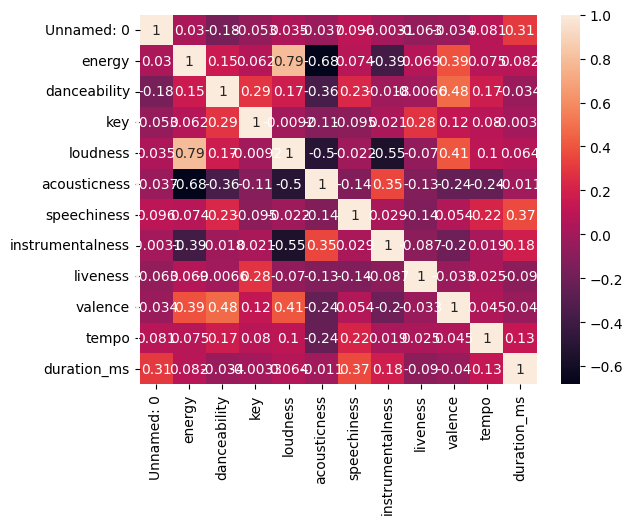

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = features_df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

# 16. Features strongly positively correlated

In [24]:

positivly = (correlation_matrix[(correlation_matrix > 0.65) & (correlation_matrix < 1.0)])
print("\nFeatures strongly positively correlated:")
print(positivly.dropna(axis=1, how='all'))


Features strongly positively correlated:
                   energy  loudness
Unnamed: 0            NaN       NaN
energy                NaN   0.79164
danceability          NaN       NaN
key                   NaN       NaN
loudness          0.79164       NaN
acousticness          NaN       NaN
speechiness           NaN       NaN
instrumentalness      NaN       NaN
liveness              NaN       NaN
valence               NaN       NaN
tempo                 NaN       NaN
duration_ms           NaN       NaN


# 17. Features strongly negatively correlated

In [25]:

positivly = (correlation_matrix[(correlation_matrix < -0.5) & (correlation_matrix > -1.0)])
print("\nFeatures strongly negatively correlated:")
print(positivly.dropna(axis=1, how='all'))


Features strongly negatively correlated:
                    energy  loudness  acousticness  instrumentalness
Unnamed: 0             NaN       NaN           NaN               NaN
energy                 NaN       NaN     -0.682479               NaN
danceability           NaN       NaN           NaN               NaN
key                    NaN       NaN           NaN               NaN
loudness               NaN       NaN           NaN         -0.553735
acousticness     -0.682479       NaN           NaN               NaN
speechiness            NaN       NaN           NaN               NaN
instrumentalness       NaN -0.553735           NaN               NaN
liveness               NaN       NaN           NaN               NaN
valence                NaN       NaN           NaN               NaN
tempo                  NaN       NaN           NaN               NaN
duration_ms            NaN       NaN           NaN               NaN


# 18.Features not correlated

In [26]:

corr_treshold = 0.3
not_correlated_pairs = (correlation_matrix.abs() < corr_treshold) & (correlation_matrix.abs() > 0)

print("\nPairs of features not correlated:")
print(not_correlated_pairs)



Pairs of features not correlated:
                  Unnamed: 0  energy  danceability    key  loudness  \
Unnamed: 0             False    True          True   True      True   
energy                  True   False          True   True     False   
danceability            True    True         False   True      True   
key                     True    True          True  False      True   
loudness                True   False          True   True     False   
acousticness            True   False         False   True     False   
speechiness             True    True          True   True      True   
instrumentalness        True   False          True   True     False   
liveness                True    True          True   True      True   
valence                 True   False         False   True     False   
tempo                   True    True          True   True      True   
duration_ms            False    True          True   True      True   

                  acousticness  speechine

# 19. Comparing Scores Between Genres

In [27]:
# Grouping by  different scores between genres ver2

genres_list = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']
genres_df = df[df['genre'].isin(genres_list)]

for feature in ['danceability', 'loudness', 'acousticness']:
    print(f"{feature} by genre:")
    print(genres_df.groupby('genre')[feature].mean())
    print('*'*40)

danceability by genre:
genre
Alternative/Indie    0.661750
Dance/Electronic     0.755000
Hip-Hop/Rap          0.765538
Pop                  0.677571
Name: danceability, dtype: float64
****************************************
loudness by genre:
genre
Alternative/Indie   -5.421000
Dance/Electronic    -5.338000
Hip-Hop/Rap         -6.917846
Pop                 -6.460357
Name: loudness, dtype: float64
****************************************
acousticness by genre:
genre
Alternative/Indie    0.583500
Dance/Electronic     0.099440
Hip-Hop/Rap          0.188741
Pop                  0.323843
Name: acousticness, dtype: float64
****************************************


# 20. Ideas for further analysis

a) comparing results by months  and selecting the best gender, artists and track

b) analysis data by years to verify trends 
